<a href="https://colab.research.google.com/github/Andoniadou-Lab/consensus_pituitary_atlas/blob/main/Supp_Fig_1_peaks_celltype_representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install packages


In [1]:
!pip install scanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.6/176.6 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 121.4 MB/s eta 0:00:00


# Mounting Drive onto colab

In [2]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import scanpy as sc
adata = sc.read_h5ad("/content/drive/MyDrive/pituitary_atlas/Unstructured/pb_h5ad_2026_01_28.h5ad")
adata


AnnData object with n_obs × n_vars = 337 × 245876
    obs: 'sample', 'cell_type', 'Sex', '_scvi_batch', '_scvi_labels', 'Conditions', 'Author', 'Modality', 'GEO', 'psbulk_n_cells', 'psbulk_counts'
    var: 'count', 'selected'
    layers: 'psbulk_props'

In [6]:
#convert to floats
adata.obs["psbulk_counts"] = adata.obs["psbulk_counts"].astype(float)
adata.obs["psbulk_n_cells"] = adata.obs["psbulk_n_cells"].astype(float)

adata.obs["psbulk_counts_per_cell"] = adata.obs["psbulk_counts"].values / adata.obs["psbulk_n_cells"].values
#run sc qc
sc.pp.calculate_qc_metrics(adata, inplace=True)
adata.obs

,sample,cell_type,Sex,_scvi_batch,_scvi_labels,Conditions,Author,Modality,GEO,psbulk_n_cells,psbulk_counts,psbulk_counts_per_cell,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
GSM4594382_Corticotrophs,GSM4594382,Corticotrophs,1.0,0,0,normal,Ruf-Zamojski et al. (2021),atac,GSM4594382,116.0,1715443.0,14788.301724,179728,12.099205,1715443.0,14.355183,0.503135,0.944771,1.753133,3.883720
GSM4594385_Corticotrophs,GSM4594385,Corticotrophs,0.0,3,0,normal,Ruf-Zamojski et al. (2021),atac,GSM4594385,259.0,2138869.0,8258.181467,174094,12.067356,2138869.0,14.575788,0.588909,1.106379,2.068430,4.607108
GSM4594386_Corticotrophs,GSM4594386,Corticotrophs,0.0,4,0,normal,Ruf-Zamojski et al. (2021),atac,GSM4594386,385.0,1785188.0,4636.851948,179765,12.099411,1785188.0,14.395035,0.547057,1.024934,1.906298,4.207232
GSM4594387_Corticotrophs,GSM4594387,Corticotrophs,0.0,5,0,normal,Ruf-Zamojski et al. (2021),atac,GSM4594387,557.0,2550936.0,4579.777379,192018,12.165350,2550936.0,14.751971,0.514086,0.966116,1.804397,4.034558
GSM4594388_Corticotrophs,GSM4594388,Corticotrophs,0.0,6,0,normal,Ruf-Zamojski et al. (2021),atac,GSM4594388,757.0,5904416.0,7799.756935,221285,12.307211,5904416.0,15.591211,0.507586,0.952745,1.773063,3.944200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM9301723_Thyrotrophs,GSM9301723,Thyrotrophs,1.0,42,0,Fshb-Enh2-KO,Jin et al. (2025),atac,GSM9301723,113.0,848763.0,7511.176991,153569,11.941912,848763.0,13.651536,0.646117,1.167346,2.117670,4.569002
GSM9301724_Thyrotrophs,GSM9301724,Thyrotrophs,1.0,43,0,IgG-treated,Jin et al. (2025),atac,GSM9301724,180.0,1679595.0,9331.083333,196849,12.190197,1679595.0,14.334064,0.461004,0.846811,1.555256,3.412311
GSM9301725_Thyrotrophs,GSM9301725,Thyrotrophs,1.0,44,0,IgG-treated,Jin et al. (2025),atac,GSM9301725,106.0,923346.0,8710.811321,168841,12.036719,923346.0,13.735761,0.565660,1.017387,1.836256,3.970776
GSM9301727_Thyrotrophs,GSM9301727,Thyrotrophs,1.0,46,0,Bimagrumab-treated,Jin et al. (2025),atac,GSM9301727,152.0,1223248.0,8047.684211,180059,12.101045,1223248.0,14.017021,0.517884,0.949194,1.732927,3.771598


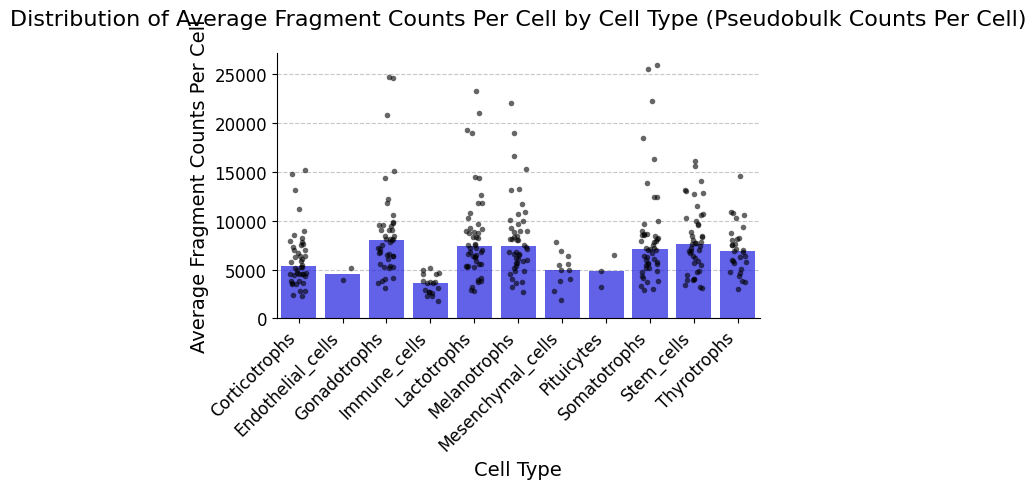

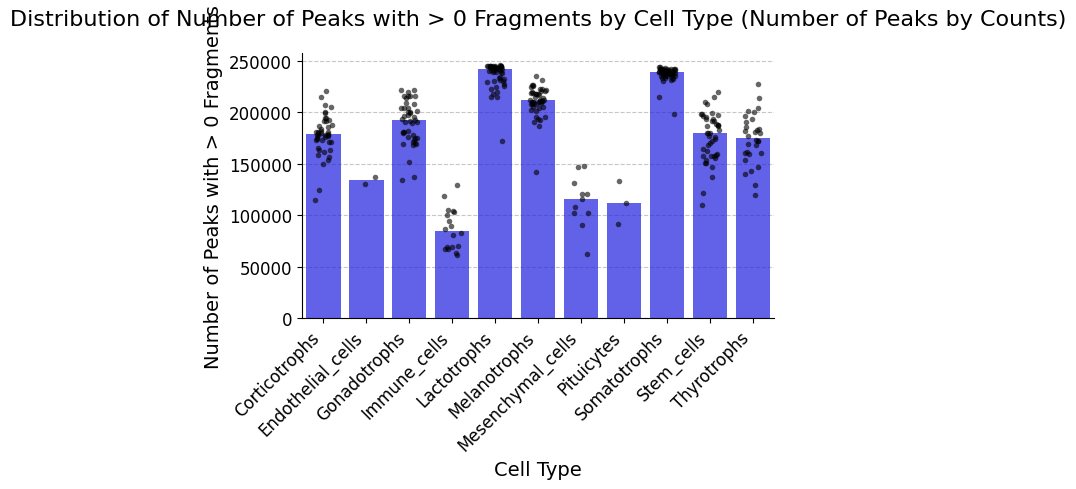

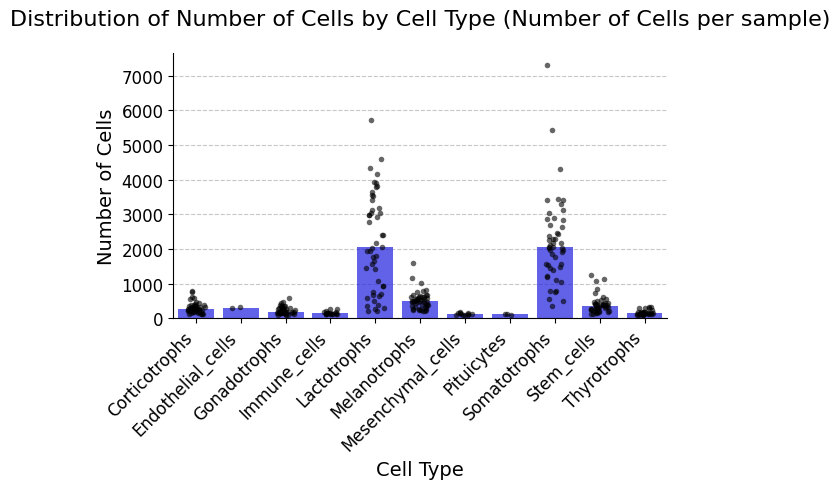

In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np


def plot_strip_barplot(adata_obj, metric_col, cell_type_col="cell_type", title_suffix="", y_label=""):
    """
    Generates a nature journal style tidy strip-barplot.

    Args:
        adata_obj (anndata.AnnData): The anndata object containing the data.
        metric_col (str): The name of the column in adata.obs to plot on the y-axis.
        cell_type_col (str): The name of the column in adata.obs for cell types (x-axis).
        title_suffix (str): Additional text for the plot title.
        y_label (str): Label for the y-axis.
    """
    df_plot = adata_obj.obs.copy()

    plt.figure(figsize=(6, 5))
    ax = plt.gca()


    sns.barplot(
        data=df_plot,
        x=cell_type_col,
        y=metric_col,
        estimator=np.median,
        errorbar=None,
        color = '#0000ff',
        alpha=0.7,
        ax=ax
    )

    sns.stripplot(
        data=df_plot,
        x=cell_type_col,
        y=metric_col,
        jitter=0.2,
        color="black",
        size=4,
        alpha=0.6,
        ax=ax
    )

    ax.set_title(f'Distribution of {y_label} by Cell Type {title_suffix}', fontsize=16, pad=20)
    ax.set_xlabel('Cell Type', fontsize=14)
    ax.set_ylabel(y_label, fontsize=14)

    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)

    sns.despine(ax=ax, top=True, right=True)

    ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)
    ax.set_axisbelow(True)

    plt.savefig(f'distribution_of_{metric_col}_by_cell_type{title_suffix}.png', dpi=400, bbox_inches='tight')
    plt.savefig(f'distribution_of_{metric_col}_by_cell_type{title_suffix}.svg', format='svg', dpi=400, bbox_inches='tight')

    plt.tight_layout()
    plt.show()

# Plot for 'psbulk_counts_per_cell'
plot_strip_barplot(
    adata_obj=adata,
    metric_col='psbulk_counts_per_cell',
    title_suffix='(Pseudobulk Counts Per Cell)',
    y_label='Average Fragment Counts Per Cell'
)

# Plot for 'n_genes_by_counts'
plot_strip_barplot(
    adata_obj=adata,
    metric_col='n_genes_by_counts',
    title_suffix='(Number of Peaks by Counts)',
    y_label='Number of Peaks with > 0 Fragments'
)

# Plot for 'n_genes_by_counts'
plot_strip_barplot(
    adata_obj=adata,
    metric_col="psbulk_n_cells",
    title_suffix='(Number of Cells per sample)',
    y_label='Number of Cells'
)

In [8]:
pip freeze

absl-py==1.4.0
accelerate==1.12.0
access==1.1.10.post3
affine==2.4.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.13.3
aiosignal==1.4.0
aiosqlite==0.22.1
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.18.3
altair==5.5.0
anndata==0.12.10
annotated-doc==0.0.4
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.12.1
anywidget==0.9.21
apsw==3.51.2.0
apswutils==0.1.2
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array-api-compat==1.13.0
array_record==0.8.3
arrow==1.4.0
arviz==0.22.0
astropy==7.2.0
astropy-iers-data==0.2026.2.2.0.48.1
astunparse==1.6.3
atpublic==5.1
attrs==25.4.0
audioread==3.1.0
Authlib==1.6.6
autograd==1.8.0
babel==2.18.0
backcall==0.2.0
beartype==0.22.9
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.33.0
bigquery-magics==0.10.3
bleach==6.3.0
blinker==1.9.0
blis==1.3.3
blobfile==3.1.0
blosc2==4.0.0
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.2
brotli==1.2.0
CacheControl==0.14.4
cachetools==7.0.